In [1]:
#packages
library(statsr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(data.table)

Warning message:
: package 'dplyr' was built under R version 3.3.1
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
: package 'ggplot2' was built under R version 3.3.1Warning message:
: package 'gridExtra' was built under R version 3.3.1
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, last



In [2]:
#loading data
load("brfss2013.Rdata")

## q1  is brfss2013  subject heights are normally distributed? 

* variable htm4

In [3]:
#summary of the variable shows out of 491775 points there are 7643 NAs ( 1.5 %)
nrow(brfss2013)
summary(brfss2013$htm4)

[1] 491775

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0   163.0   168.0   169.3   178.0  2469.0    7643 

In [4]:
#filter the data get rid of NAs + filter extreme values
#borders 50 and 280 come from wikipedia from the list of shortest and tallest pbeople
cbrfss2013<-brfss2013 %>% filter(!is.na(htm4) & htm4 > 50 & htm4 < 280)

In [5]:
summary(cbrfss2013$htm4)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   91.0   163.0   168.0   169.3   178.0   236.0 

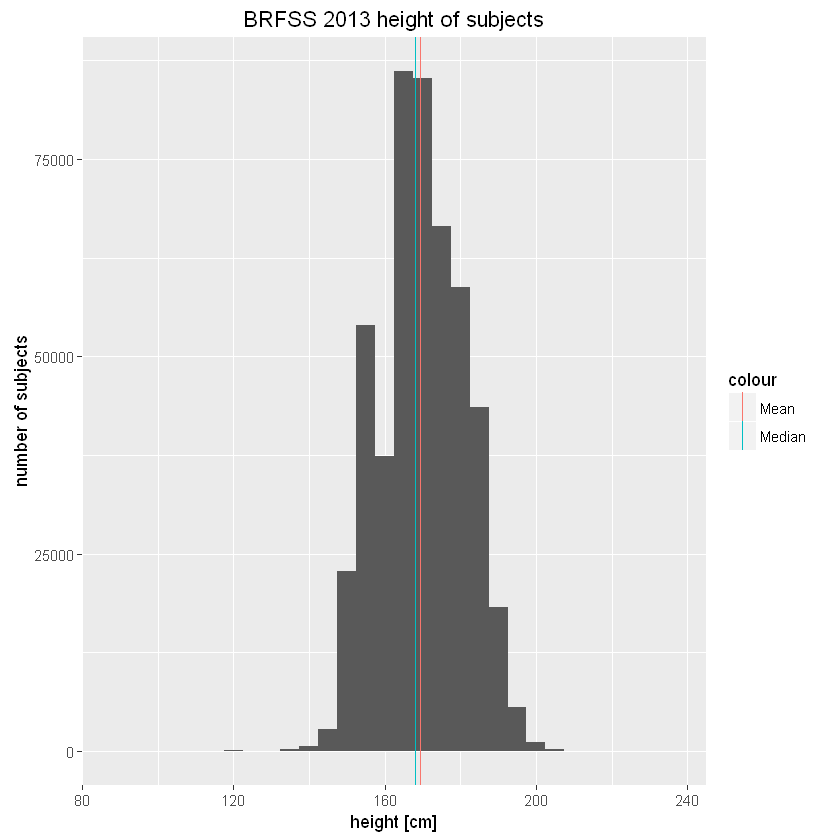

In [6]:
#plotting of histogram along with its mean and median we observe that the histogram is unimodal and appear to be symmetric
print(
ggplot(data = cbrfss2013,  aes(x = htm4)) +
  geom_histogram(bins=30)
  + ggtitle("BRFSS 2013 height of subjects") 
  + labs(x="height [cm]",y="number of subjects") 
  + geom_vline(aes(xintercept=mean(cbrfss2013$htm4),color="Mean"))
  + geom_vline(aes(xintercept=median(cbrfss2013$htm4),color="Median"))
) 



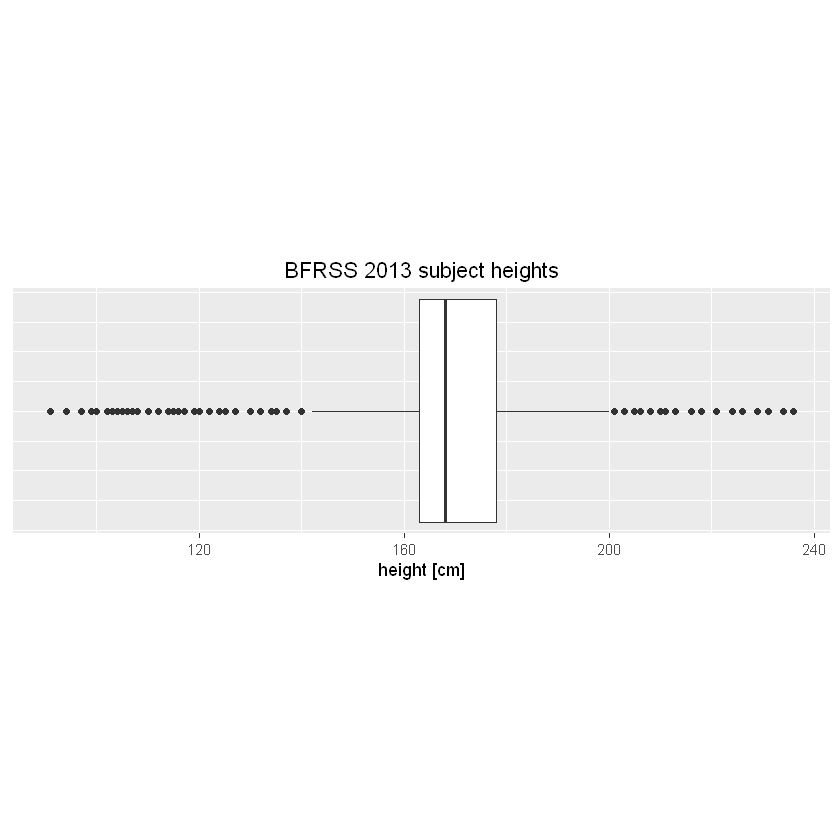

In [7]:
##check the symmetri of the distribution
print(
ggplot(data=cbrfss2013, aes(x=0, y=htm4))
  + geom_boxplot() + coord_flip() 
  + ggtitle("BFRSS 2013 subject heights") 
 + labs(y="height [cm]", x="" ) 
 + theme(axis.title.y=element_blank(), axis.ticks.y=element_blank(), axis.text.y=element_blank(), aspect.ratio=0.3 )
)
# we can observe a limited  lack of symmetrie of the median between first and 3rd quartile 

In [8]:
## see 1sd, 2sd 3 sd percentages
ssd<-sd(cbrfss2013$htm4)
smu <-mean(cbrfss2013$htm4)

In [9]:
cbrfss2013 <- cbrfss2013 %>%
mutate(in_1sd = ifelse(abs(htm4 -smu) < 1*ssd, 1, 0)
      ,in_2sd = ifelse(abs(htm4 -smu) < 2*ssd, 1, 0)
      ,in_3sd = ifelse(abs(htm4 -smu) < 3*ssd, 1, 0))

In [10]:
#print the percenrages
print('number and percentage of subjects having a height within 1 standard deviation from the mean')
cbrfss2013 %>% filter(in_1sd ==1) %>% summarize(count=n(), pct=n()/nrow(cbrfss2013))
print('number and percentage of subjects having a height  within 2 standard deviation from the mean')
cbrfss2013 %>% filter(in_2sd ==1) %>% summarize(count=n(), pct=n()/nrow(cbrfss2013))
print('number and percentage of subjects having a height  within 3 standard deviation from the mean')
cbrfss2013 %>% filter(in_3sd ==1) %>% summarize(count=n(), pct=n()/nrow(cbrfss2013))

[1] "number and percentage of subjects having a height within 1 standard deviation from the mean"


,count,pct
1,3.08366e+05,6.36954e-01


[1] "number and percentage of subjects having a height  within 2 standard deviation from the mean"


,count,pct
1,4.66406e+05,9.63398e-01


[1] "number and percentage of subjects having a height  within 3 standard deviation from the mean"


,count,pct
1,4.82738e+05,9.97133e-01


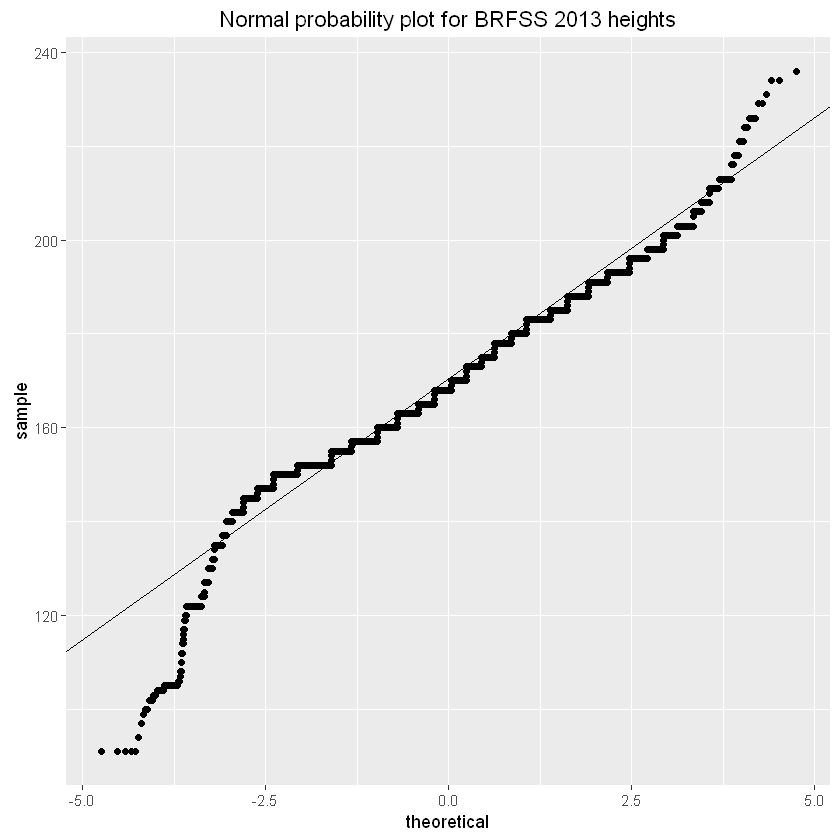

In [11]:
## normal probaility plot
qqplot.qq <- function (vec, titlestr) # argument: vector of numbers
{
  # following four lines from base R's qqline()
  y <- quantile(vec[!is.na(vec)], c(0.25, 0.75))
  x <- qnorm(c(0.25, 0.75))
  slope <- diff(y)/diff(x)
  int <- y[1L] - slope * x[1L]

  d <- data.frame(resids = vec)

  ggplot(d, aes(sample = resids)) + stat_qq() + geom_abline(slope = slope, intercept = int) + ggtitle(titlestr)
}

#call the func
qqplot.qq(cbrfss2013$htm4, 'Normal probability plot for BRFSS 2013 heights')
# We can observe that in the interval between 2.5 standard deviations of theoretical quantiles
# following the standard normal distribution N(0,1)  the sample data follows relatively closely the theoretical line
#deviations  from the line  suggesst that heights data have larger tails (more rare events) than those  from a true normal distribution. 

## q1 we can deduce that subject heights only approximately follow the normal distribution

### q2  Are college educated people in good health with lower income more likely to make an economic decision to  forgo a health insurance when compared to people with  pre-college education from the same income category ?

In [12]:
#0 select variables to work on
#X_rfhlth: Adults with good or better health b,X_rfhlth,X_educag,X_incomg,hlthpln1)
sel_brfss2013 <- brfss2013 %>% select (genhlth,X_rfhlth,X_educag,X_incomg,hlthpln1)
str(sel_brfss2013)

'data.frame':	491775 obs. of  5 variables:
 $ genhlth : Factor w/ 5 levels "Excellent","Very good",..: 4 3 3 2 3 2 4 3 1 3 ...
 $ X_rfhlth: Factor w/ 2 levels "Good or Better Health",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ X_educag: Factor w/ 4 levels "Did not graduate high school",..: 4 3 4 2 4 4 2 3 4 2 ...
 $ X_incomg: Factor w/ 5 levels "Less than $15,000",..: 5 5 5 5 4 5 NA 4 5 2 ...
 $ hlthpln1: Factor w/ 2 levels "Yes","No": 1 1 1 1 1 1 1 1 1 1 ...


In [13]:
sel_brfss2013 <- sel_brfss2013  %>%
mutate(edu_cat = factor( ifelse( is.na(X_educag),NA
								,ifelse(X_educag %in% c("Attended college or technical school"
													   ,"Graduated from college or technical school")
										,"college education","pre-college education"))) )


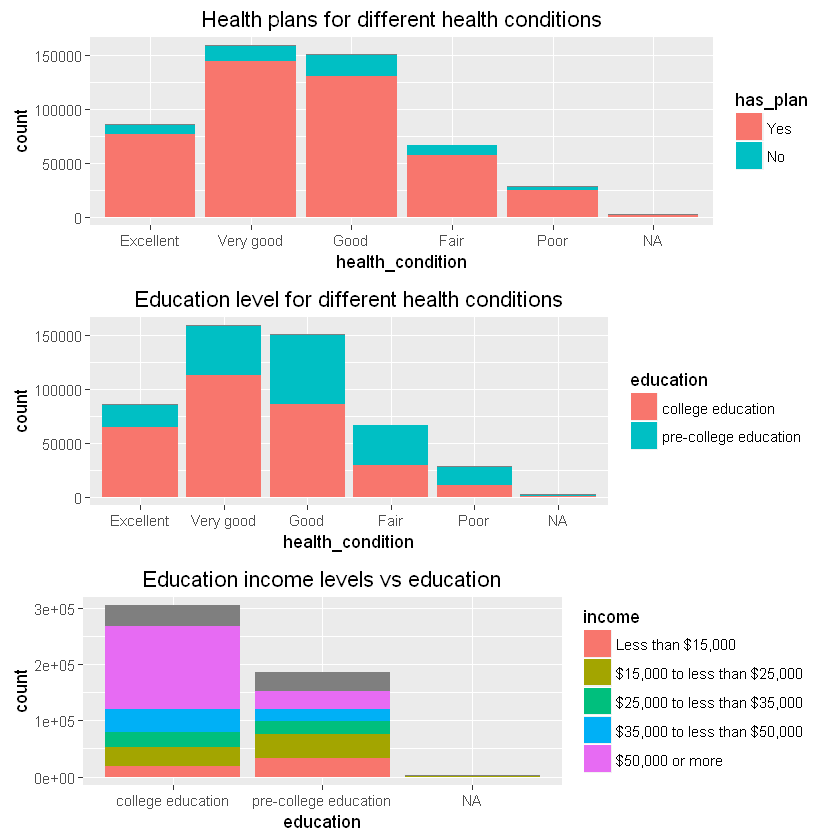

In [14]:
#motivating eda chart
#plot(sel_brfss2013$hlthpln1~sel_brfss2013$genhlth)

sel_brfss2013$health_condition<-sel_brfss2013$genhlth
sel_brfss2013$has_plan<-sel_brfss2013$hlthpln1
sel_brfss2013$education <-sel_brfss2013$edu_cat
sel_brfss2013$income <-sel_brfss2013$X_incomg

p1 <- ggplot(sel_brfss2013, aes(x=health_condition, fill =has_plan )) +
  geom_bar() +
  ggtitle("Health plans for different health conditions") 

p2 <- ggplot(sel_brfss2013, aes(x=health_condition, fill =education )) +
  geom_bar() +
  ggtitle("Education level for different health conditions") 

p3 <- ggplot(sel_brfss2013, aes(x=education, fill = income )) +
  geom_bar() +
  ggtitle("Education income levels vs education") 

grid.arrange(p1,p2,p3,nrow=3)

In [15]:
# 1.  create a health condition variable 
sel_brfss2013 <- sel_brfss2013  %>%
mutate(g_health =factor(ifelse(is.na(genhlth), NA
                       ,ifelse(genhlth %in% c("Excellent", "Very good", "Good"),
                        "excellent or good", "poor or fair"))) )

In [16]:
#2. create a variable on education level
sel_brfss2013 <- sel_brfss2013  %>%
mutate(edu_cat = factor( ifelse( is.na(X_educag),NA
								,ifelse(X_educag %in%
                                    c("Attended college or technical school"
								,"Graduated from college or technical school")
                                ,"college education","pre-college education"))) )

In [17]:
#3 create a variable on income category  low middle upper
sel_brfss2013 <- sel_brfss2013  %>%
mutate(incom_cat = factor(ifelse(is.na(X_incomg),NA
						,ifelse(X_incomg %in% 
                        c("Less than $15,000","$15,000 to less than $25,000"),"low"
                        ,ifelse(X_incomg %in% c("$25,000 to less than $35,000","$35,000 to less than $50,000")
						,"middle","upper")))) )

In [18]:
## show summary statistics 
sel_brfss2013  %>%
filter( !is.na(edu_cat) 
		& g_health =="excellent or good"  
		& incom_cat %in%c("low") 
		& has_plan == "No" ) %>%
group_by(has_plan,g_health,edu_cat,incom_cat) %>%
summarize(count=n()) %>% 
arrange(edu_cat)

,has_plan,g_health,edu_cat,incom_cat,count
1,No,excellent or good,college education,low,8599
2,No,excellent or good,pre-college education,low,11136


In [19]:
# using xtabs
xtabs(~edu_cat+incom_cat
	  ,data=sel_brfss2013 %>% filter(!is.na(edu_cat) 
								   & g_health =="excellent or good" 
								   & !is.na(incom_cat)
								   & has_plan == "No") )


                       incom_cat
edu_cat                   low middle upper
  college education      8599   5633  3710
  pre-college education 11136   5040  1879

In [20]:
#a relative frequency that a college educated person with low income forgoes a health care plan
8599 / (8599+11136)

[1] 0.4357233

#### q1 thus for low income individuas with colledge education still are more likely to take the health plan compared to those  with pre-colledge education

### q2 Among  physical activity or  healthy food which factor has a greater influence to reduce a number of sick days

In [23]:
# selection of variables
se1l_brfss2013 <- brfss2013 %>% 
select (X_frutsum  # sum of consumed fruits in 30 days
	   ,X_vegesum  # sum fo consumed vegatables in 30 days
	   ,X_pacat1  # sport activity
	   ,physhlth) # number of days sick in past 30 days
print ( str(se1l_brfss2013) )

'data.frame':	491775 obs. of  4 variables:
 $ X_frutsum: num  413 20 46 49 7 157 150 67 100 58 ...
 $ X_vegesum: num  53 148 191 136 243 143 216 360 172 114 ...
 $ X_pacat1 : Factor w/ 4 levels "Highly active",..: 4 3 4 3 4 3 2 3 2 2 ...
 $ physhlth : int  30 0 3 2 10 0 1 5 0 0 ...
NULL


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   4.353   3.000  60.000   10957 


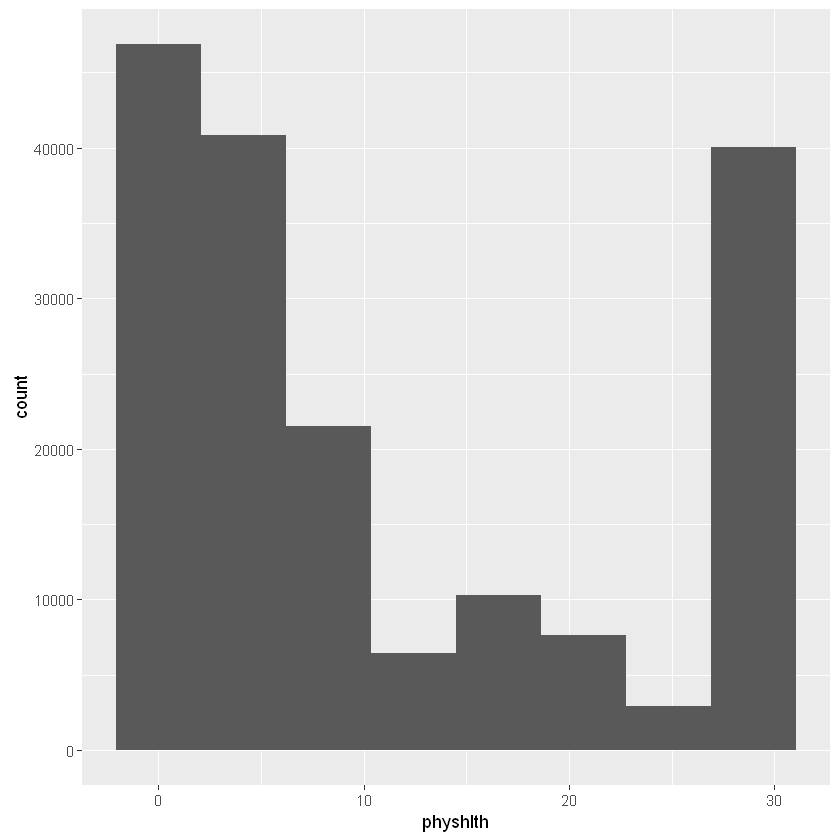

In [24]:
# motivating charts
print (summary(se1l_brfss2013$physhlth) )

p1 <- ggplot(data = se1l_brfss2013 %>% filter(physhlth>0.99 & physhlth < 32) ,  aes(x = physhlth)) +
  geom_histogram(bins=8)
print(p1)
